In [91]:
import numpy as np
import pandas as pd
from random import gauss

import warnings
warnings.filterwarnings('ignore')

In [92]:
X = np.linspace(-30, 30, 100)
y = 5 * np.square(X) + 4 * X + 3 + gauss(0, 1)
print('X:', X)
print('y:', y)

X: [-30.         -29.39393939 -28.78787879 -28.18181818 -27.57575758
 -26.96969697 -26.36363636 -25.75757576 -25.15151515 -24.54545455
 -23.93939394 -23.33333333 -22.72727273 -22.12121212 -21.51515152
 -20.90909091 -20.3030303  -19.6969697  -19.09090909 -18.48484848
 -17.87878788 -17.27272727 -16.66666667 -16.06060606 -15.45454545
 -14.84848485 -14.24242424 -13.63636364 -13.03030303 -12.42424242
 -11.81818182 -11.21212121 -10.60606061 -10.          -9.39393939
  -8.78787879  -8.18181818  -7.57575758  -6.96969697  -6.36363636
  -5.75757576  -5.15151515  -4.54545455  -3.93939394  -3.33333333
  -2.72727273  -2.12121212  -1.51515152  -0.90909091  -0.3030303
   0.3030303    0.90909091   1.51515152   2.12121212   2.72727273
   3.33333333   3.93939394   4.54545455   5.15151515   5.75757576
   6.36363636   6.96969697   7.57575758   8.18181818   8.78787879
   9.39393939  10.          10.60606061  11.21212121  11.81818182
  12.42424242  13.03030303  13.63636364  14.24242424  14.84848485
  15.454

In [96]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

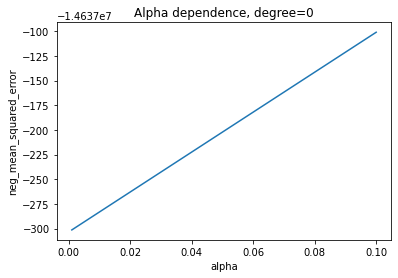

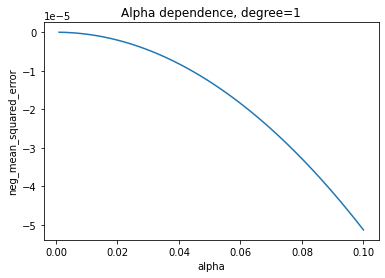

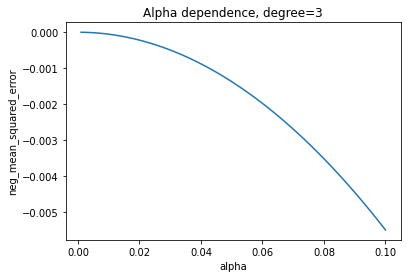

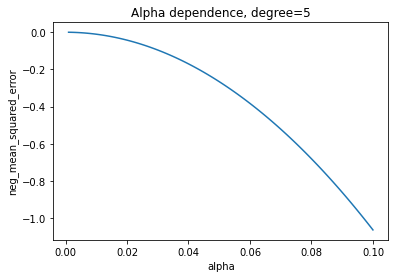

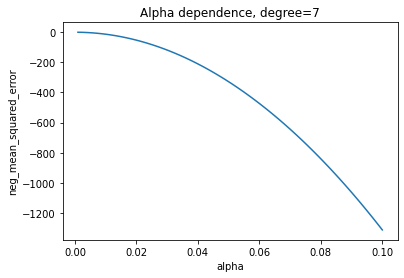

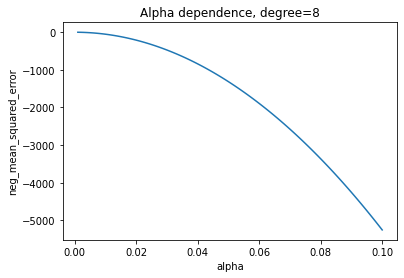

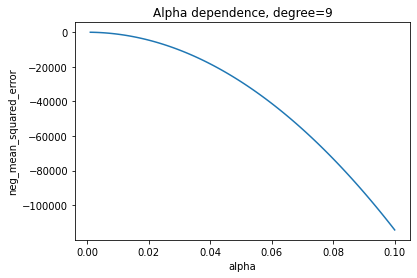

In [86]:
params = {'alpha': [1, 10]}

for dg in range(10):
    X_transformed = PolynomialFeatures(dg + 1).fit_transform(X.reshape(-1, 1))
    
    res_diff_alp = list()
    for alp in np.linspace(0.001, 0.1, 100):
        res_diff_alp.append(cross_val_score(Ridge(alpha=alp), X_transformed, y, cv=3, scoring='neg_mean_squared_error').mean())
        
    plt.plot(np.linspace(0.001, 0.1, 100), res_diff_alp)
    plt.title(f'Alpha dependence, degree={dg}')
    plt.xlabel('alpha')
    plt.ylabel('neg_mean_squared_error')
    plt.show()

#### Аналитическое представление

In [79]:
X_transformed2 = PolynomialFeatures(2).fit_transform(X.reshape(-1, 1))

In [80]:
np.linalg.inv(X_transformed2.transpose().dot(X_transformed2) + 0.1 * np.eye(3)).dot(X_transformed2.transpose().dot(y))

array([3.27576451, 3.99998693, 5.00001332])

In [81]:
r = Ridge(alpha=0.1).fit(X_transformed2, y)

In [82]:
r.coef_

array([0.        , 3.99998693, 4.99999993])

In [83]:
r.intercept_

3.283136212999807

In [168]:
ч

array([ 8.95117233e+01,  8.57141516e+01,  8.19982043e+01,  7.83638812e+01,
        7.48111825e+01,  7.13401081e+01,  6.79506581e+01,  6.46428324e+01,
        6.14166309e+01,  5.82720539e+01,  5.52091011e+01,  5.22277727e+01,
        4.93280686e+01,  4.65099888e+01,  4.37735333e+01,  4.11187022e+01,
        3.85454954e+01,  3.60539129e+01,  3.36439547e+01,  3.13156208e+01,
        2.90689113e+01,  2.69038261e+01,  2.48203653e+01,  2.28185287e+01,
        2.08983165e+01,  1.90597286e+01,  1.73027650e+01,  1.56274258e+01,
        1.40337108e+01,  1.25216202e+01,  1.10911540e+01,  9.74231200e+00,
        8.47509437e+00,  7.28950106e+00,  6.18553208e+00,  5.16318742e+00,
        4.22246709e+00,  3.36337108e+00,  2.58589939e+00,  1.89005203e+00,
        1.27582899e+00,  7.43230275e-01,  2.92255885e-01, -7.70941816e-02,
       -3.64819924e-01, -5.70921342e-01, -6.95398436e-01, -7.38251206e-01,
       -6.99479652e-01, -5.79083775e-01, -3.77063573e-01, -9.34190464e-02,
        2.71849804e-01,  